In [1]:
import sys
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/')
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/pycolmap')
from dataset import NerfDatasetRealImages, BlenderDataset


/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


torch.Size([3]) torch.Size([2500, 3])
torch.Size([3]) torch.Size([2500, 3])
torch.Size([3]) torch.Size([2500, 3])
torch.Size([3]) torch.Size([2500, 3])
torch.Size([3]) torch.Size([2500, 3])
torch.Size([3]) torch.Size([2500, 3])
torch.Size([3]) torch.Size([2500, 3])
torch.Size([3]) torch.Size([2500, 3])
torch.Size([3]) torch.Size([2500, 3])
torch.Size([3]) torch.Size([2500, 3])


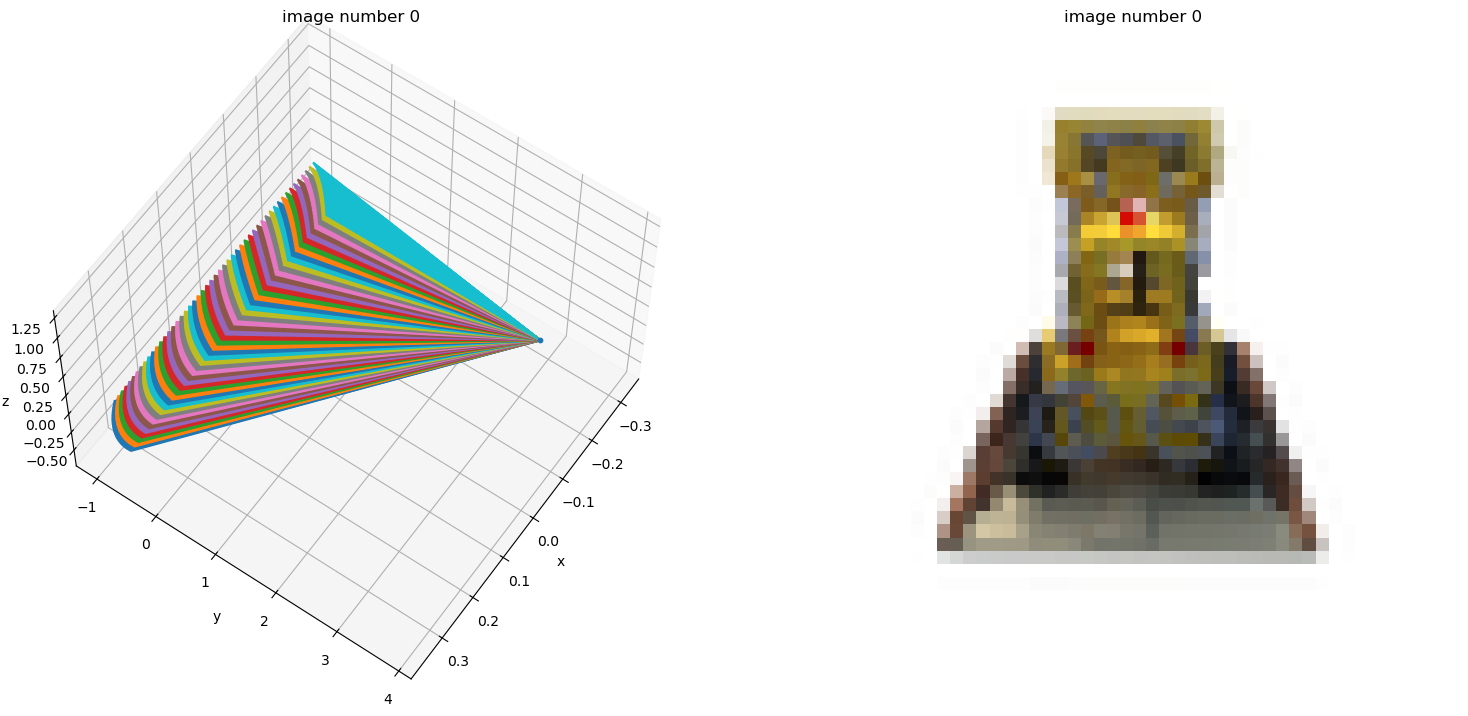

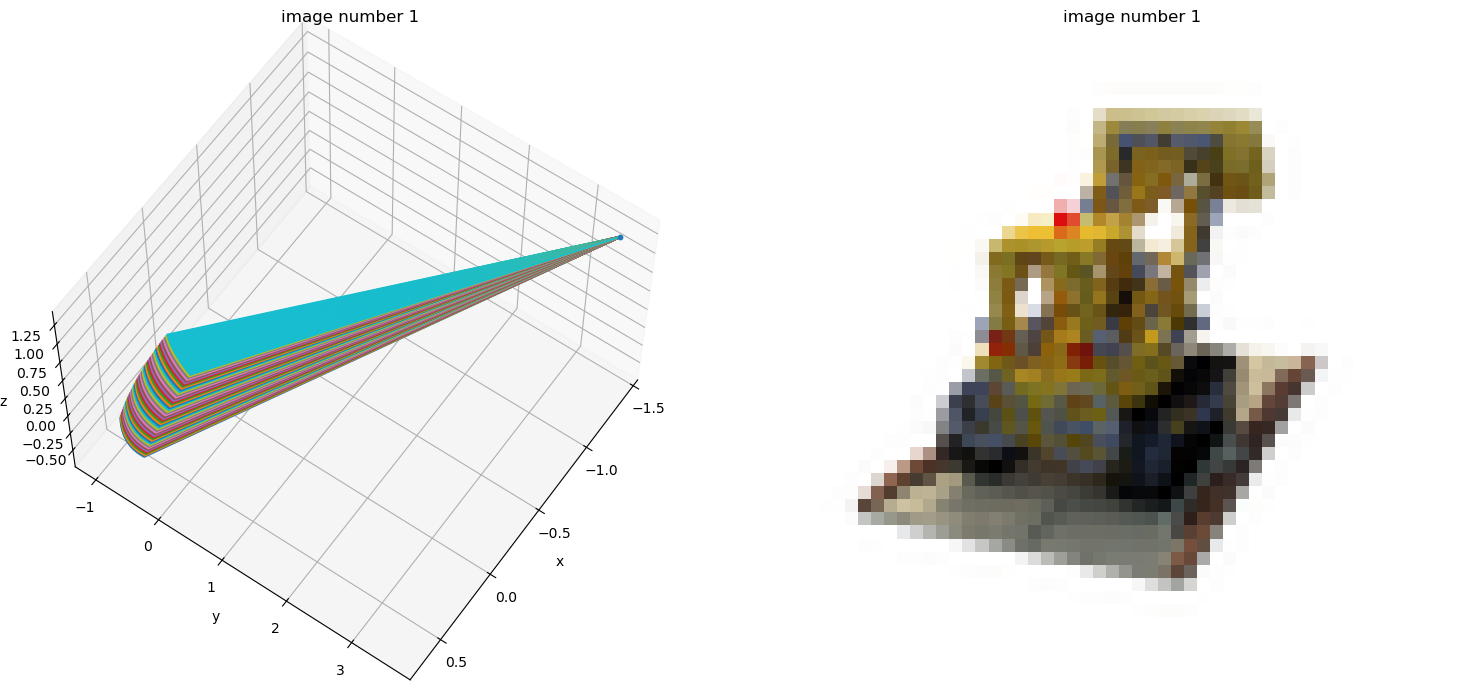

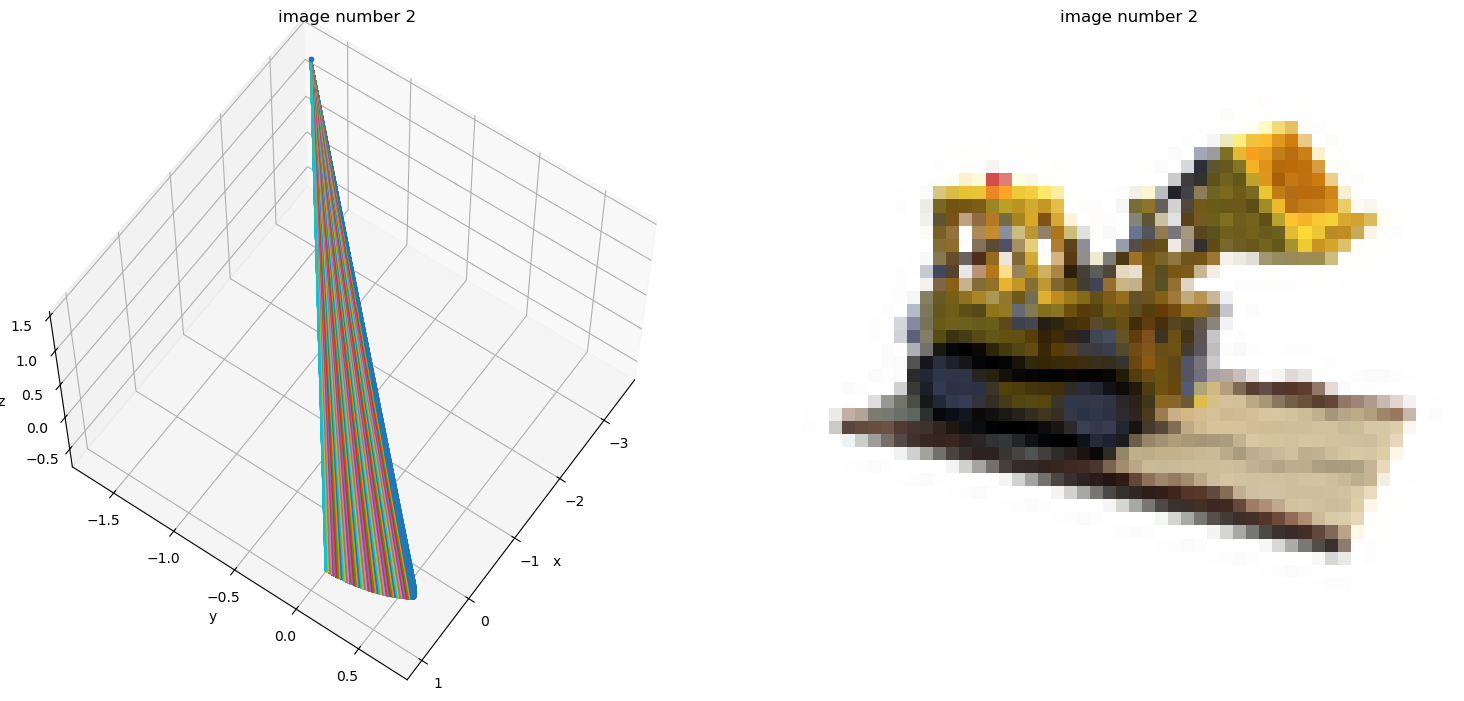

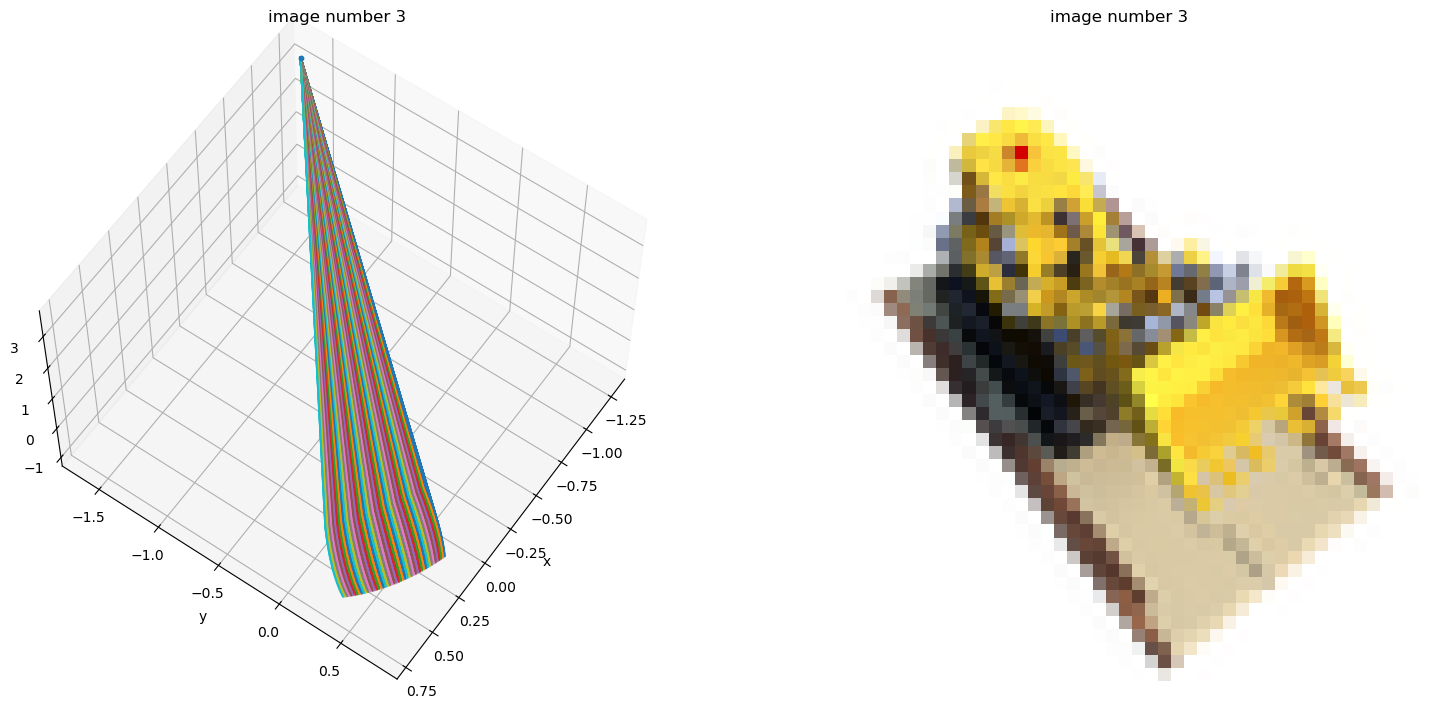

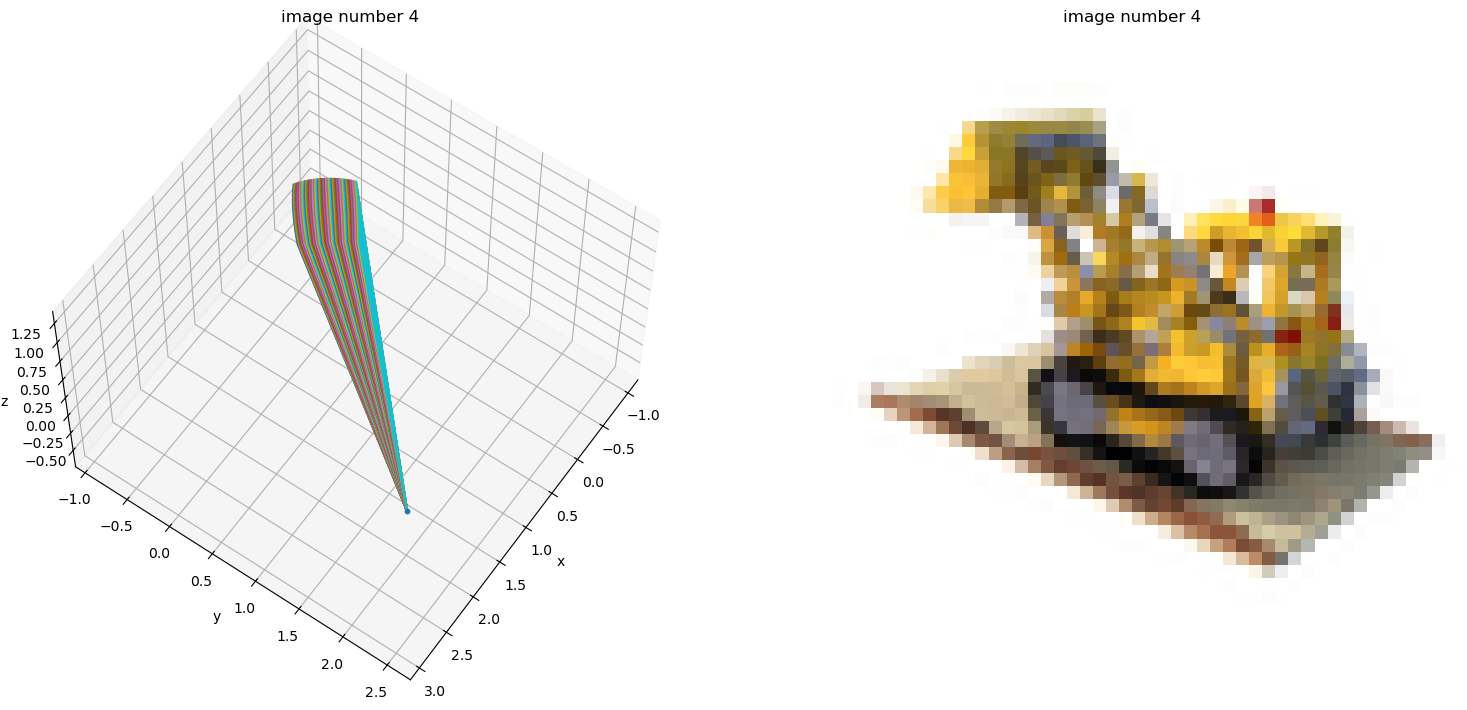

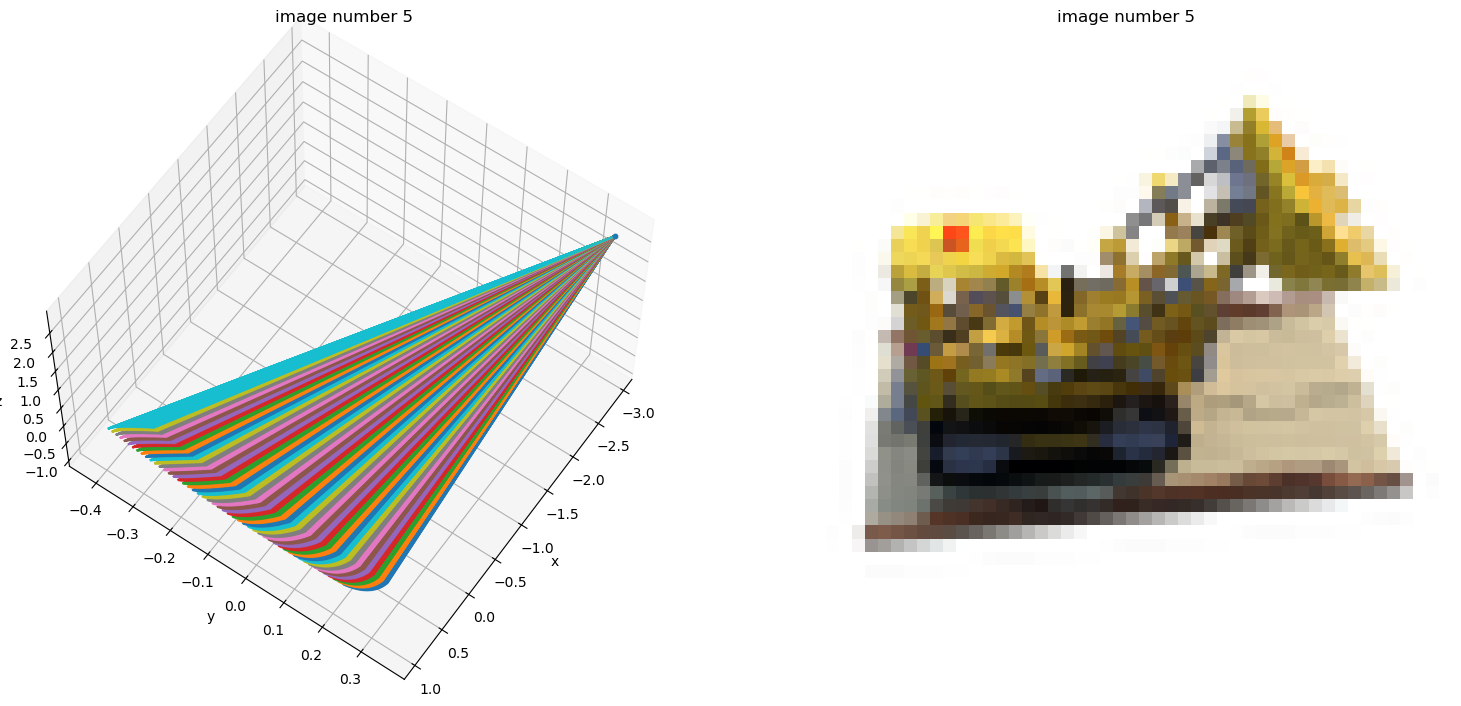

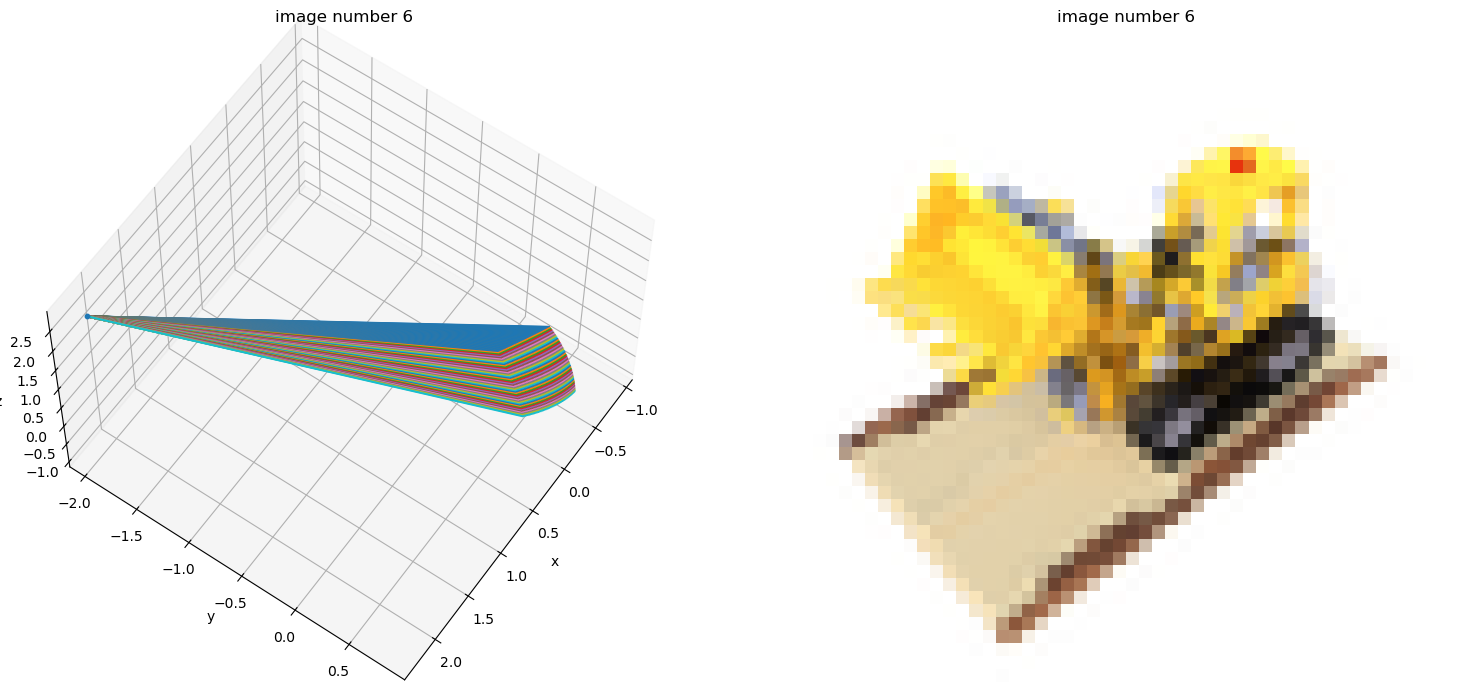

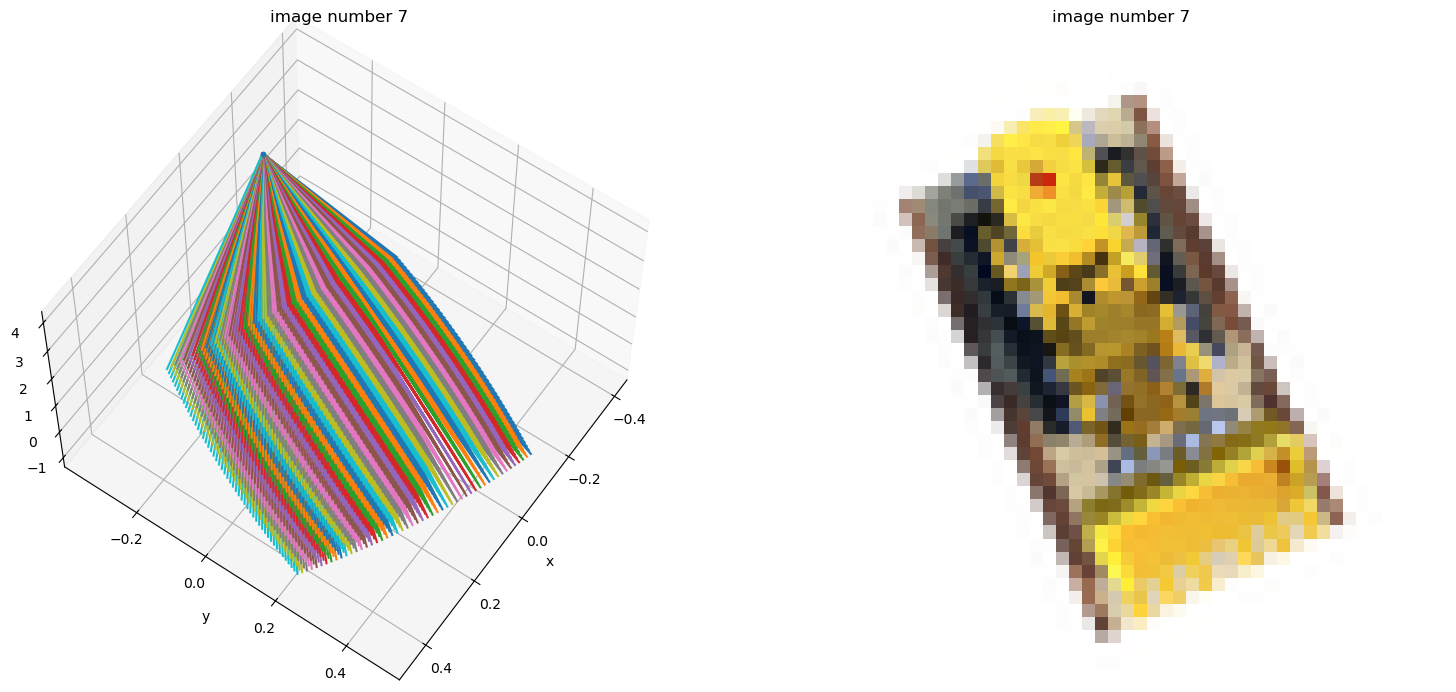

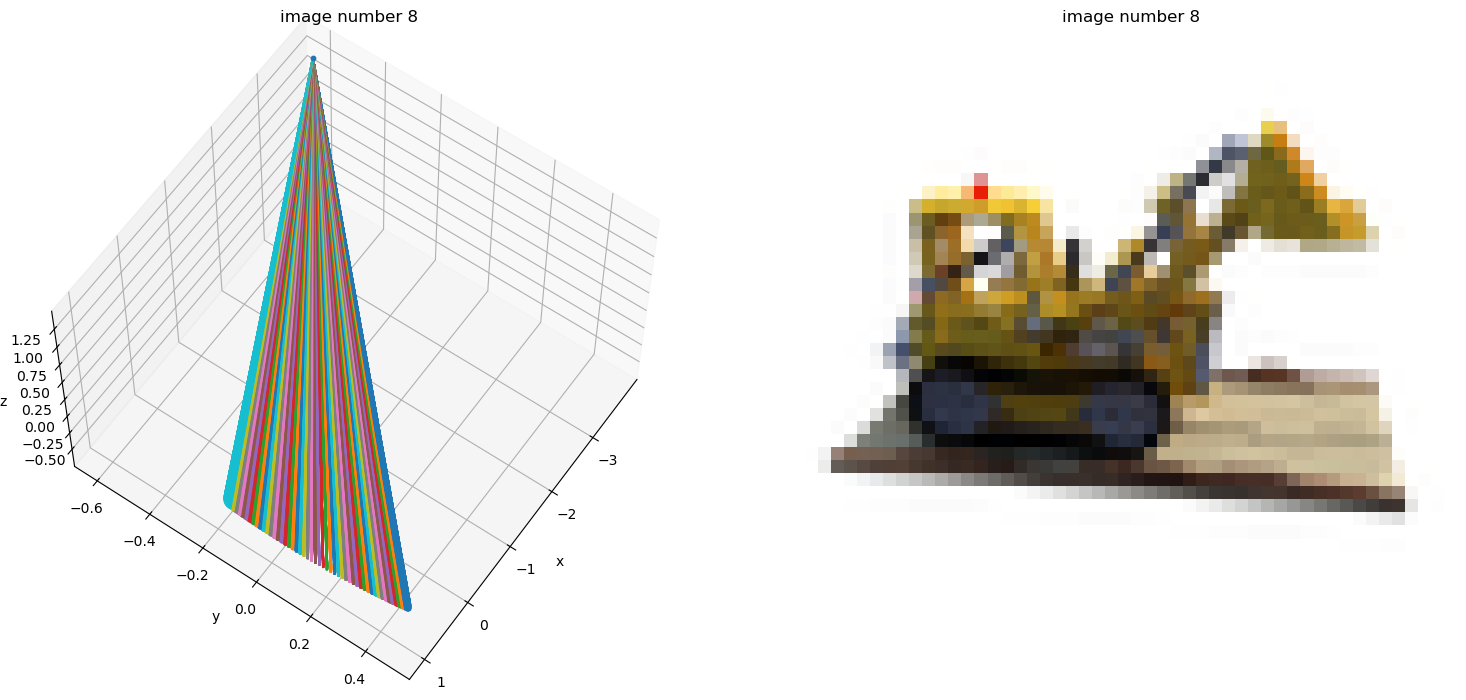

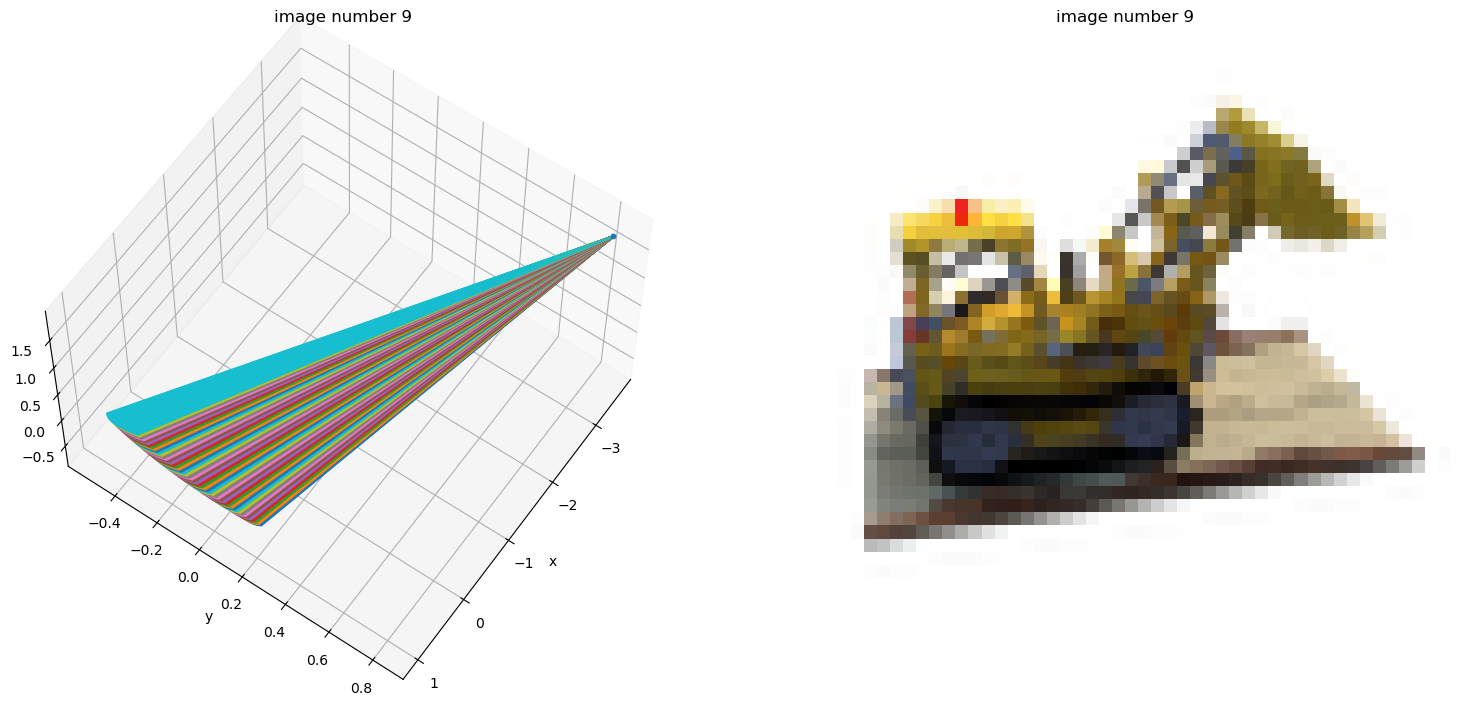

In [8]:
# blender
import matplotlib.pyplot as plt
img_res = 50

nerf_dataset = BlenderDataset(root_dir="/home/kolek/Edu/project/nerf_synthetic/lego", split="train", img_wh=(img_res, img_res))

for img_no in range(10):

    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_subplot(121, projection='3d')

    one_image = nerf_dataset[img_res * img_res * img_no : img_res  * img_res * (img_no + 1)]
    origins = one_image['rays'][...,0:3][0]
    directions = one_image['rays'][...,3:6]

    o_x, o_y, o_z = origins
    ax.scatter(o_x, o_y, o_z, label="origin", s=10)

    for ray_dir in directions:
        d_x, d_y, d_z = ray_dir
        ax.plot([o_x, d_x], [o_y, d_y], [o_z, d_z])
    plt.title(f"image number {img_no}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(60, 35)
    ax = fig.add_subplot(122)
    ax.imshow(one_image['rgbs'].reshape(img_res, img_res, 3))
    plt.axis("off")
    plt.title(f"image number {img_no}")


/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


torch.Size([20, 3, 4])
torch.Size([20, 3, 4])


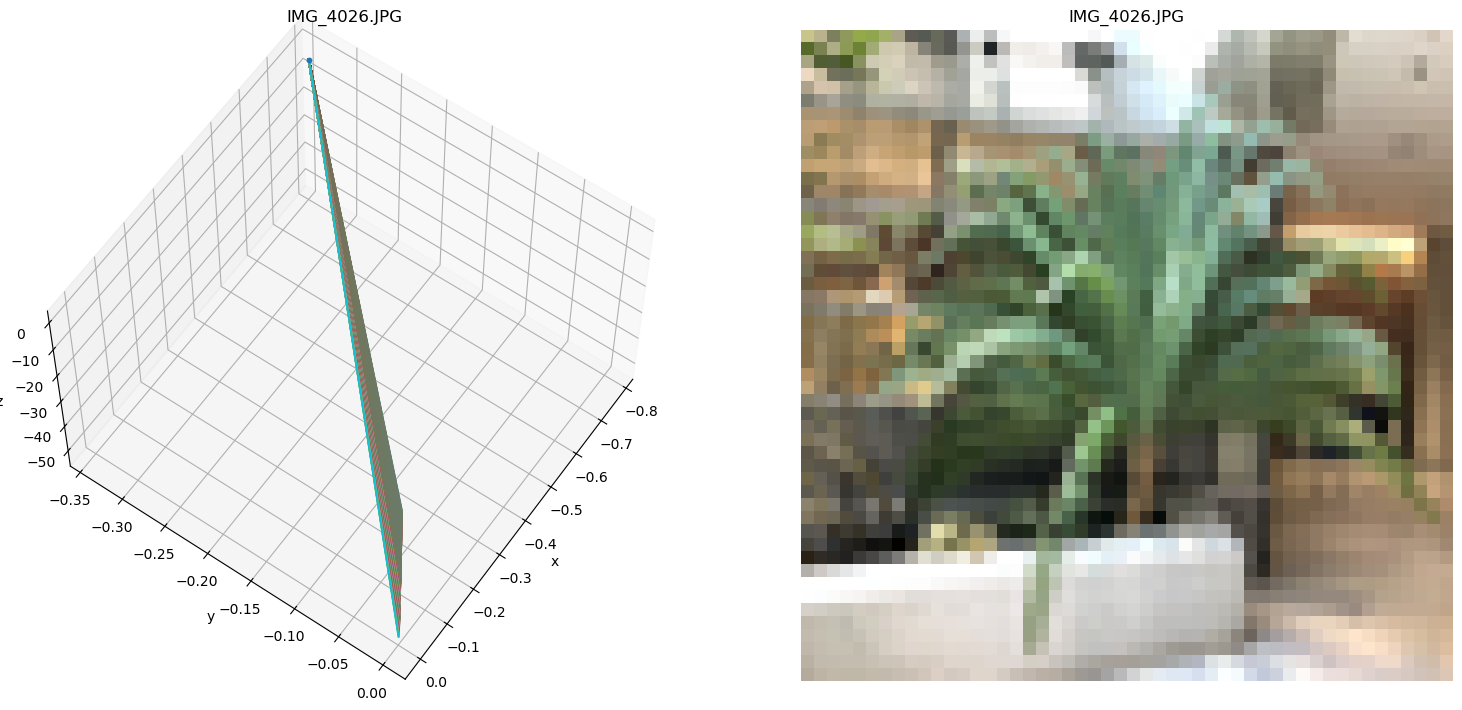

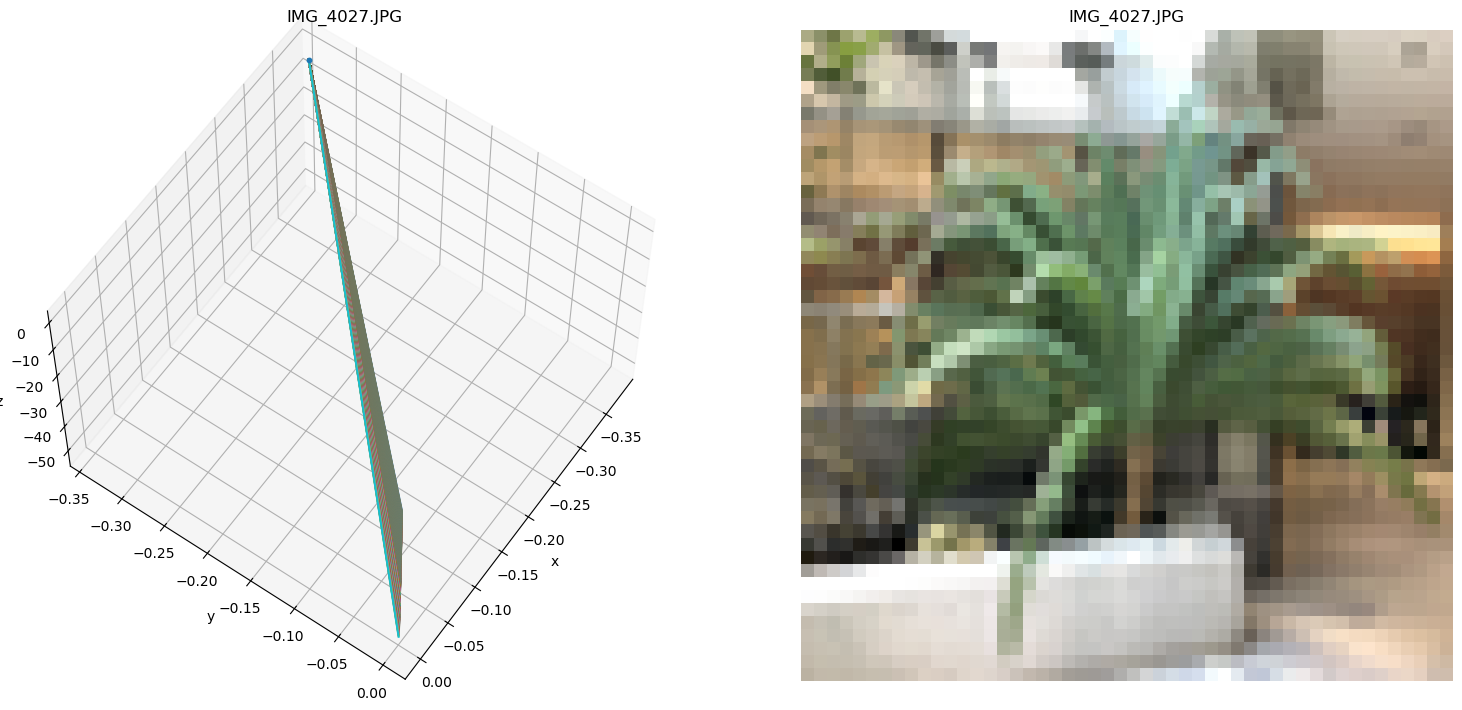

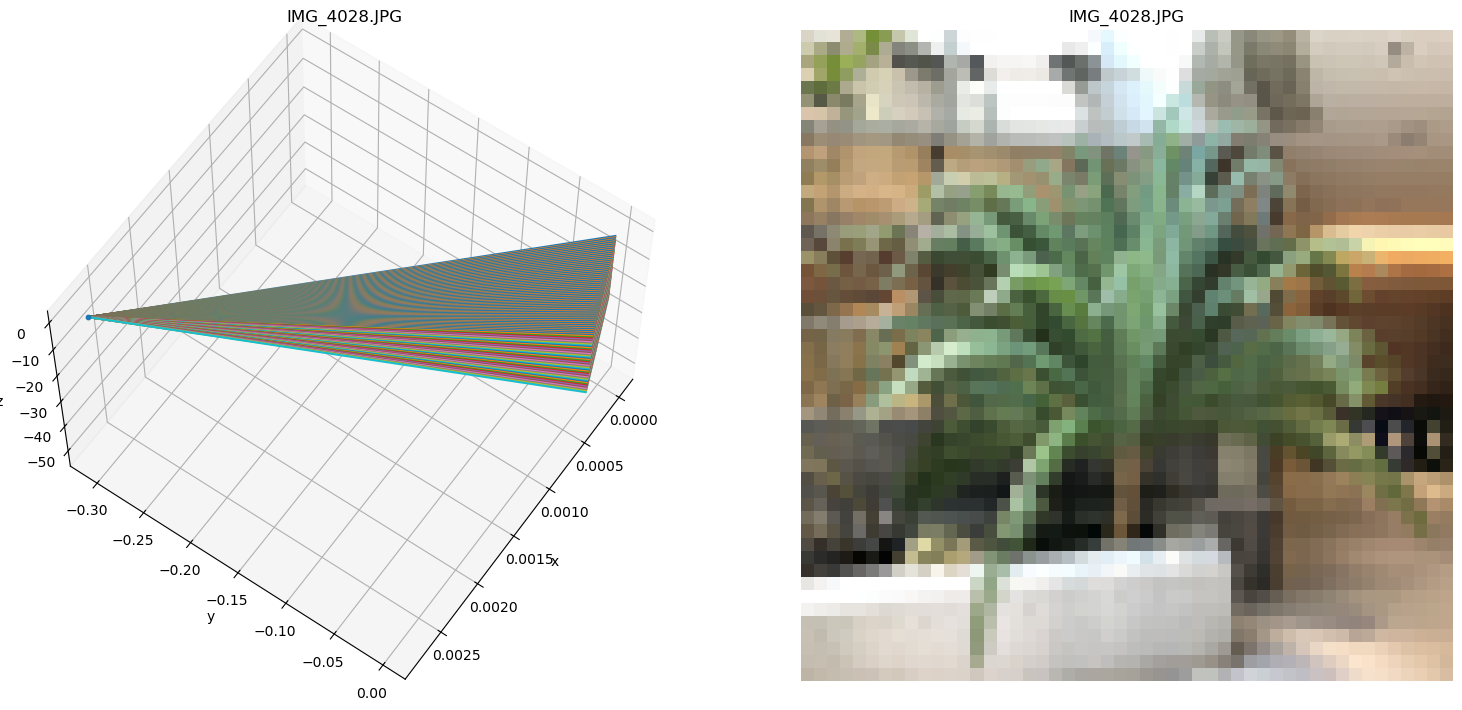

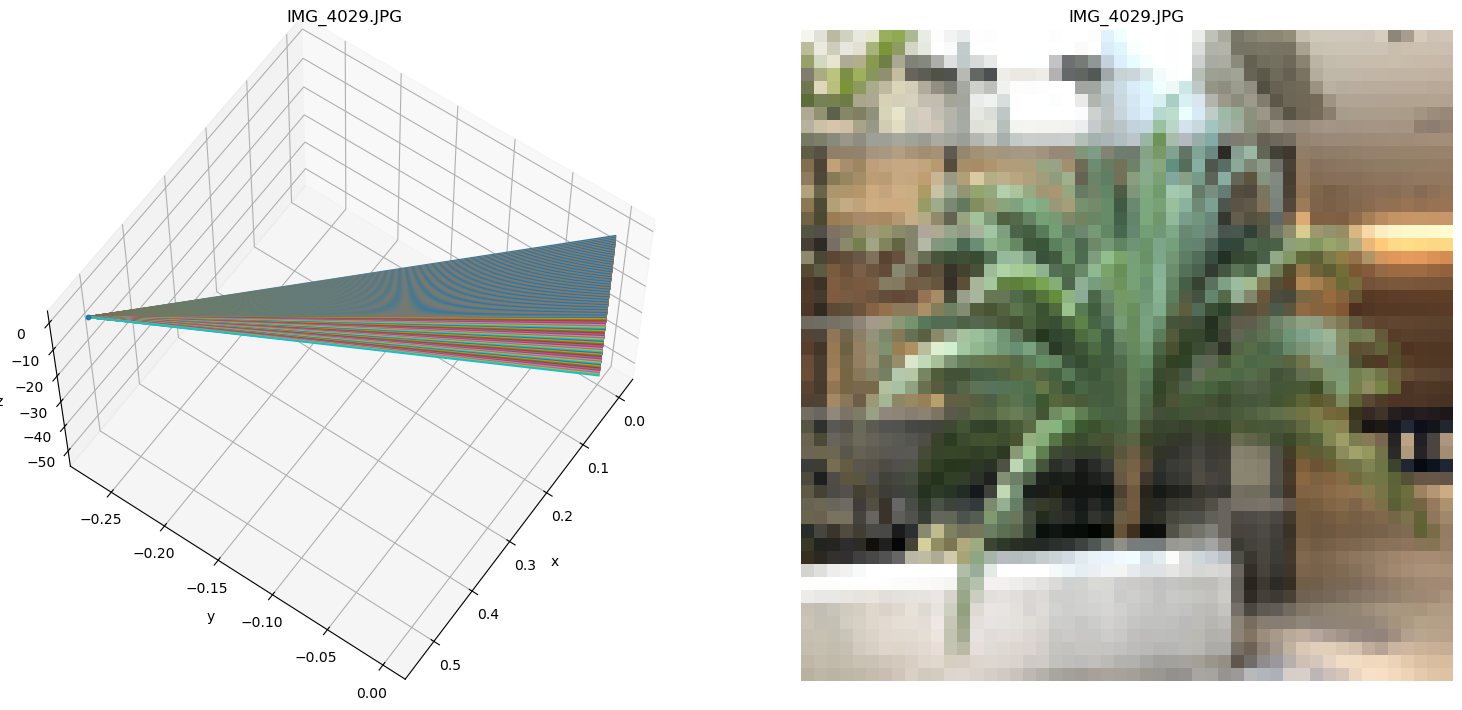

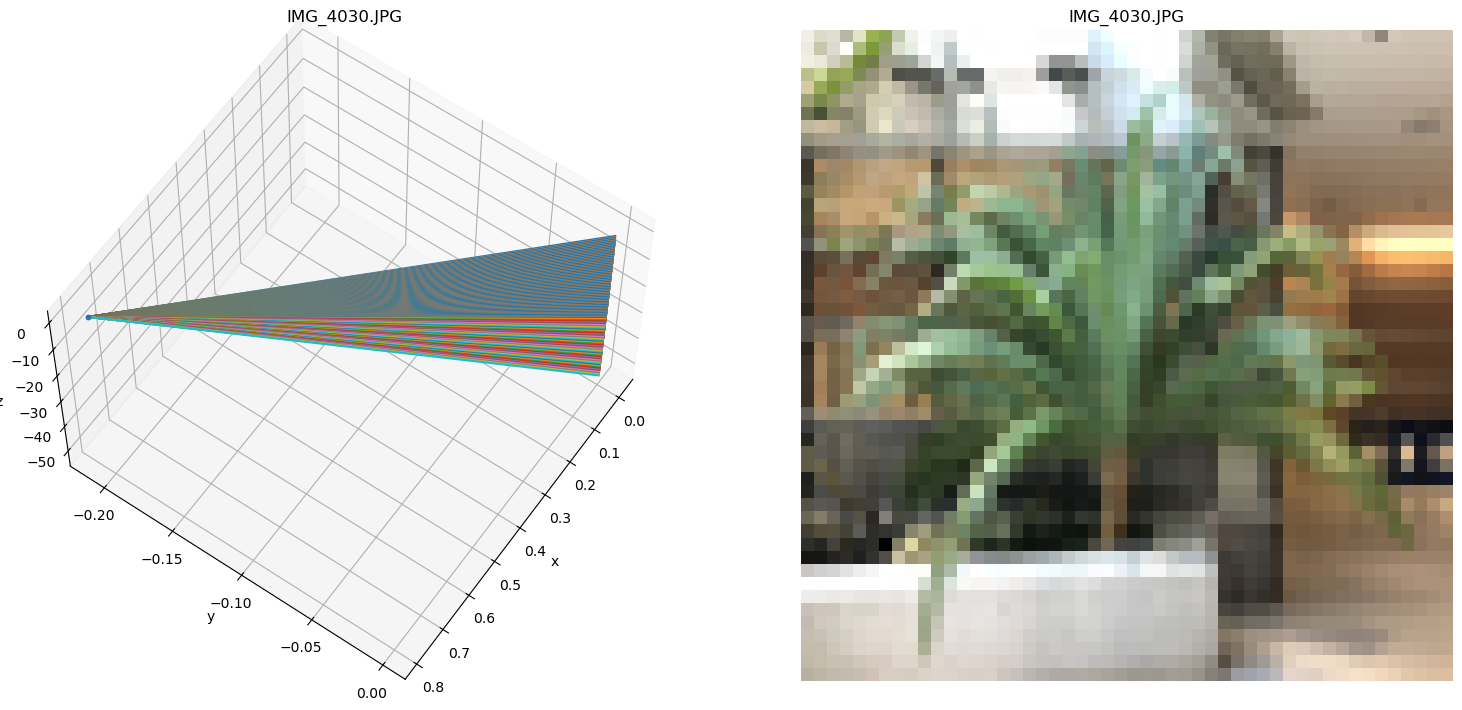

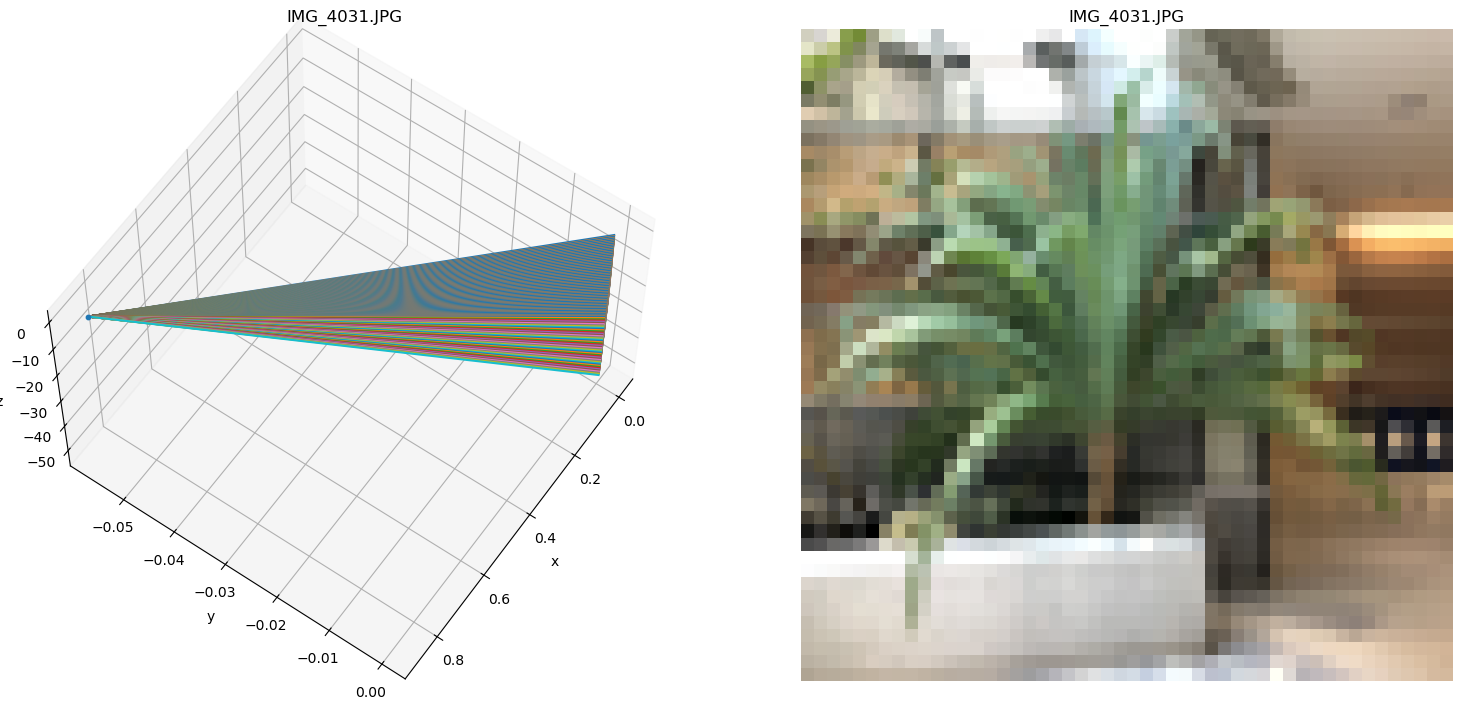

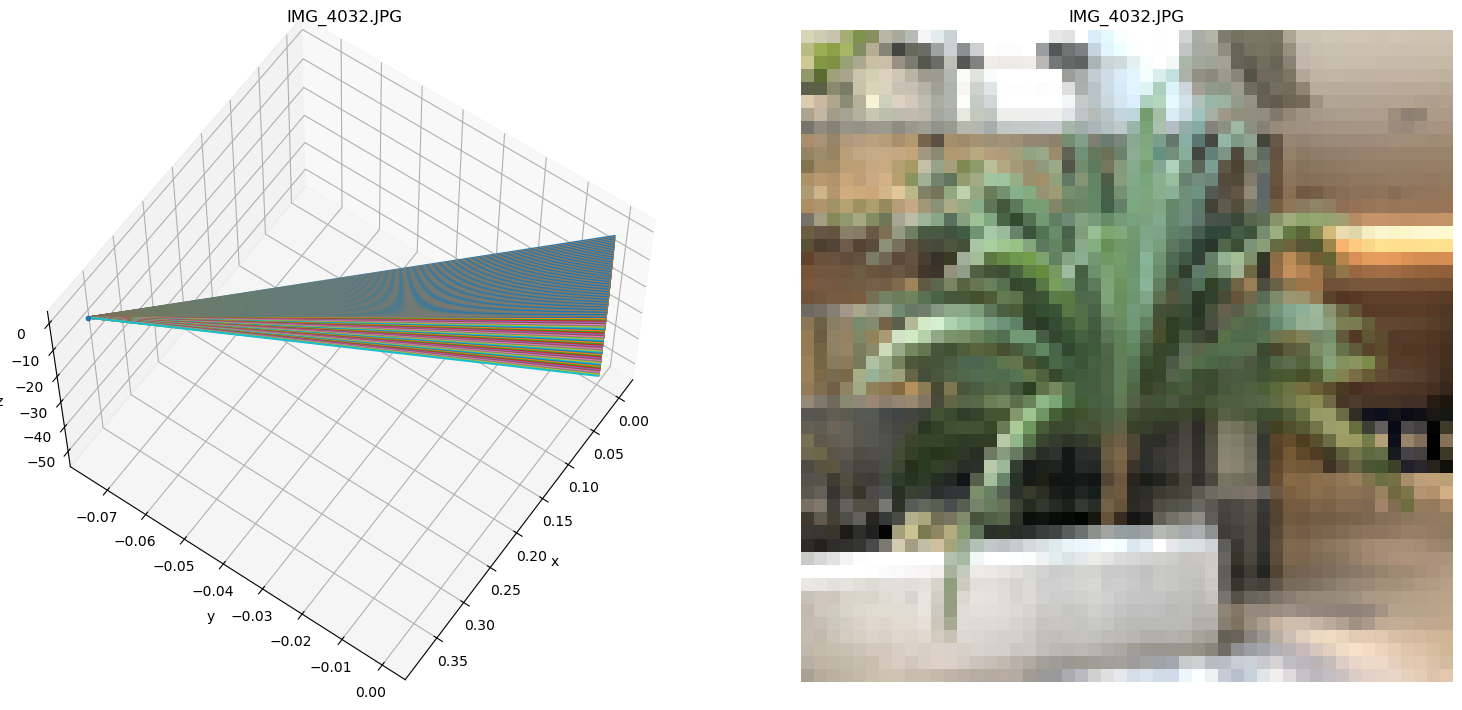

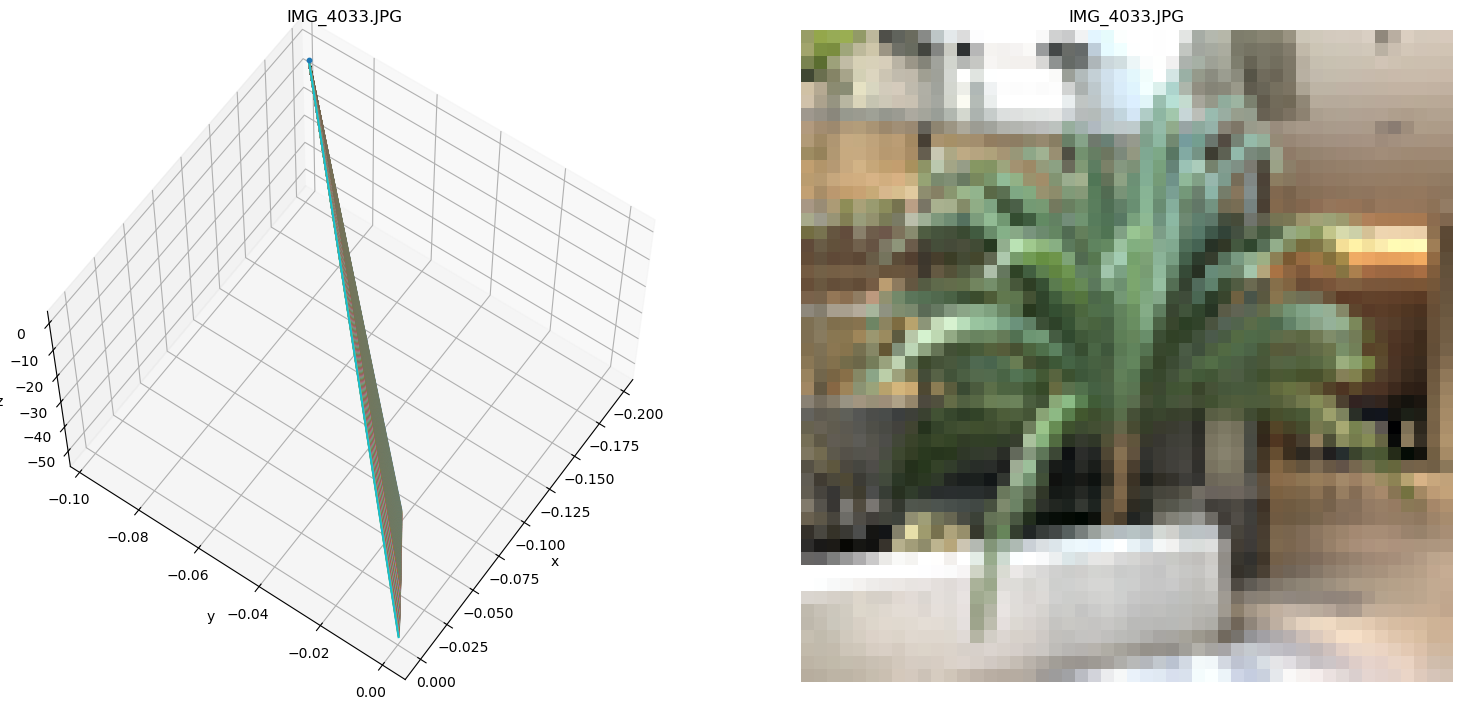

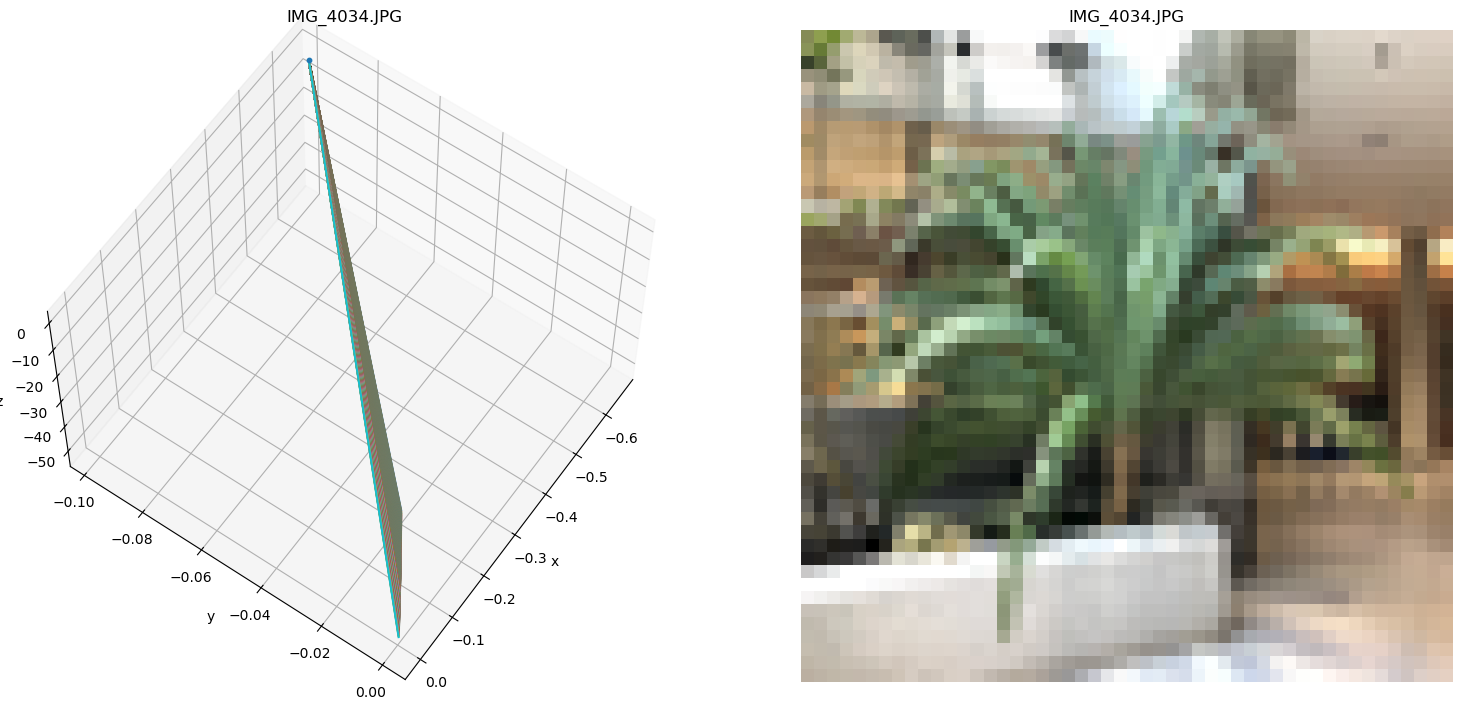

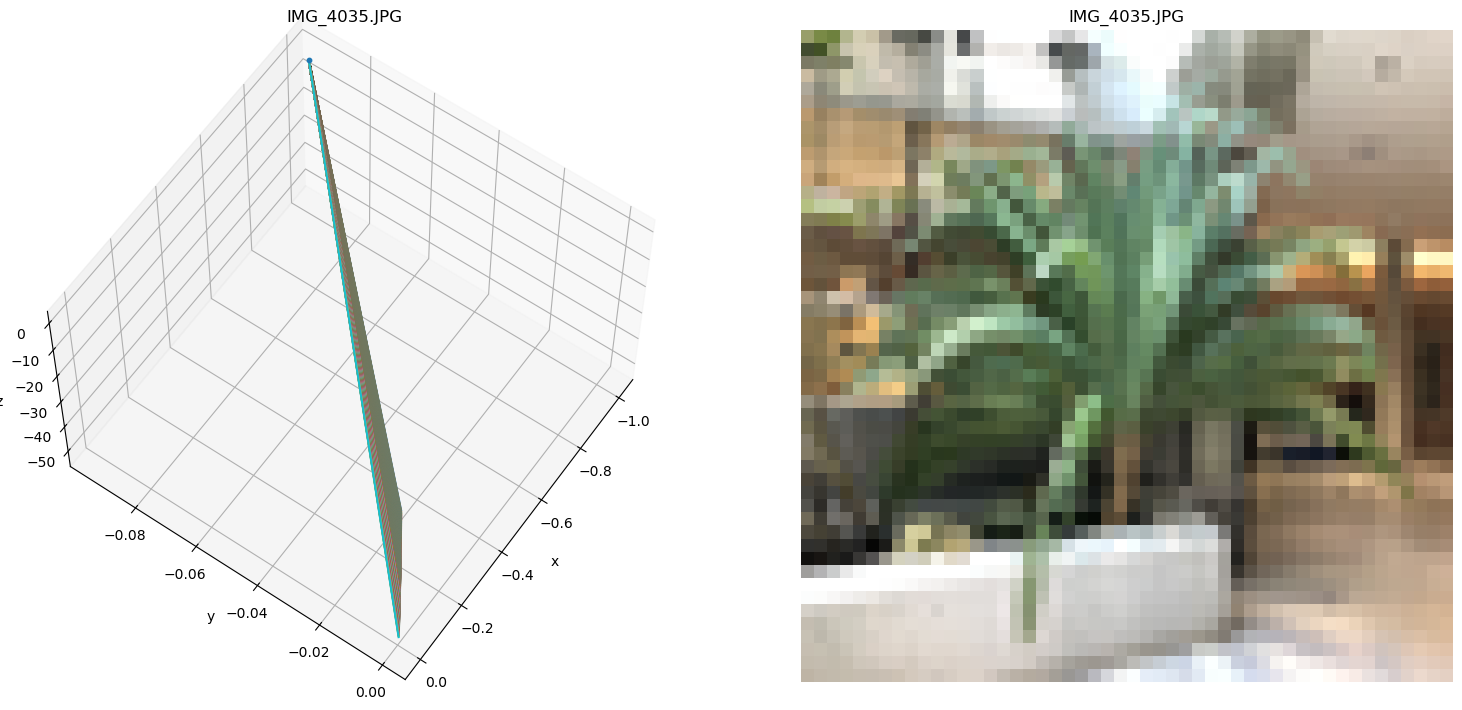

In [1]:
import sys
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/')
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/pycolmap')
from dataset import NerfDatasetRealImages, BlenderDataset
# real
from torchvision import transforms
import matplotlib.pyplot as plt

nerf_dataset = NerfDatasetRealImages(data_path="/home/kolek/Edu/project/nerf_llff_data/fern", image_width=50, image_height=50)

counter = 0

to_pil_image = transforms.ToPILImage()
for elem in nerf_dataset:
    if counter == 10:
        break
    
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_subplot(121, projection='3d')
    ray_directions = elem['ray_directions']
    ray_origins = elem['ray_origins']
    o_x, o_y, o_z = ray_origins[0]
    ax.scatter(o_x, o_y, o_z, label="origin", s=10)
    for ray_dir in ray_directions:
        d_x, d_y, d_z = ray_dir
        ax.plot([o_x, d_x], [o_y, d_y], [o_z, d_z])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(60, 35)
    plt.title(elem['image_name'])
    ax = fig.add_subplot(122)
    ax.imshow(elem['rgb'].permute(1, 2, 0))
    plt.axis("off")
    plt.title(elem['image_name'])
    counter += 1

In [1]:
import sys
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/')
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/pycolmap')
import nerf_system

config = {
    'input_size_ray': 3,
    'input_size_direction': 3,
    'n_ray_samples': 12,
    'image_width': 150,
    'image_height': 150,
    'batch_size': 150 * 150,
    'use_positional_encoding': True,
    'use_hierarchical_sampling': False,
    #'dataset_type': 'real',
    #'train_dataloader_path': '/home/kolek/Edu/project/coffee_nerf/',
    "dataset_type": "blender",
    "train_dataset_path": "/home/kolek/Edu/project/nerf_synthetic/lego",
}

nerfsys = nerf_system.NerfSystem(**config)

/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Model inputs (63, 27)


In [2]:
import lightning as L
epochs = 20
trainer = L.Trainer(
    max_epochs=epochs,
    accelerator="auto",
    enable_model_summary=True,
    enable_progress_bar=True,
    #num_sanity_val_steps=1,
    #check_val_every_n_epoch=1,
    benchmark=False,
    profiler=None,
    log_every_n_steps=24
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


In [3]:
trainer.fit(nerfsys)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                             | Type                        | Params
---------------------------------------------------------------------------------
0 | ray_sampler_in_linear_disparity  | RaySamplerLinearInDisparity | 0     
1 | ray_sampler_pdf                  | RaySamplerPDF               | 0     
2 | volume_renderer                  | VolumeRenderer              | 0     
3 | loss                             | MSELoss                     | 0     
4 | positional_encoder_ray_direction | PositionalEncoder           | 0     
5 | positional_encoder_ray_points    | PositionalEncoder           | 0     
6 | coarse_model                     | NerfModel                   | 530 K 
---------------------------------------------------------------------------------
530 K     Trainable params
0         Non-trainable params
530 K     Total params
2.120     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

<class 'tuple'>


AttributeError: 'tuple' object has no attribute 'size'

In [1]:
# training on real data
import sys
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/')
sys.path.insert(1, '/home/kolek/Edu/project/video-to-3d/src/pycolmap')
import nerf_system

config = {
    'input_size_ray': 3,
    'input_size_direction': 3,
    'n_ray_samples': 10,
    'image_width': 150,
    'image_height': 150,
    'batch_size': 1,
    'use_positional_encoding': True,
    'dataset_type': 'real',
    'train_dataset_path': '/home/kolek/Edu/project/nerf_llff_data/fern',
}

nerfsys = nerf_system.NerfSystem(**config)

/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Model inputs (63, 27)


In [2]:
import lightning as L
epochs = 5
trainer = L.Trainer(
    max_epochs=epochs,
    accelerator="auto",
    enable_model_summary=True,
    enable_progress_bar=True,
    #num_sanity_val_steps=1,
    #check_val_every_n_epoch=1,
    benchmark=False,
    profiler=None,
    log_every_n_steps=24
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                             | Type              | Params
-----------------------------------------------------------------------
0 | ray_sampler                      | RaySampler        | 0     
1 | volume_renderer                  | VolumeRenderer    | 0     
2 | loss                             | MSELoss           | 0     
3 | positional_encoder_ray_direction | PositionalEncoder | 0     
4 | positional_encoder_ray_points    | PositionalEncoder | 0     
5 | model                            | NerfModel         | 530 K 
-----------------------------------------------------------------------
530 K     Trainable params
0         Non-trainable params
530 K     Total params
2.120     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


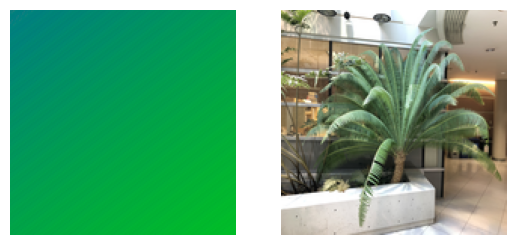

/home/kolek/miniconda3/envs/usual/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (20) is smaller than the logging interval Trainer(log_every_n_steps=24). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


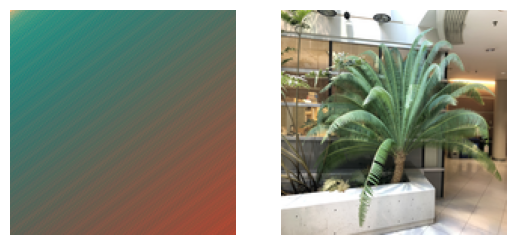

Validation: |          | 0/? [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


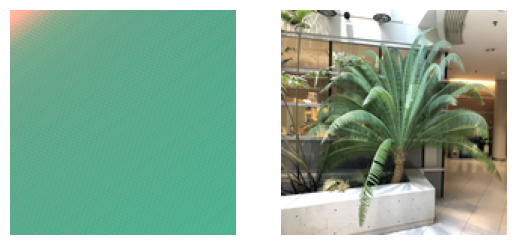

Validation: |          | 0/? [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


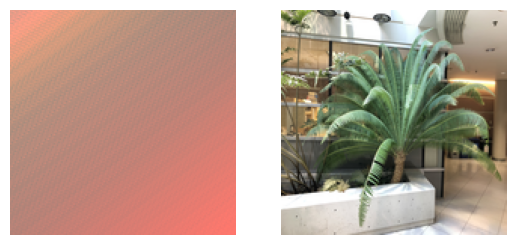

Validation: |          | 0/? [00:00<?, ?it/s]

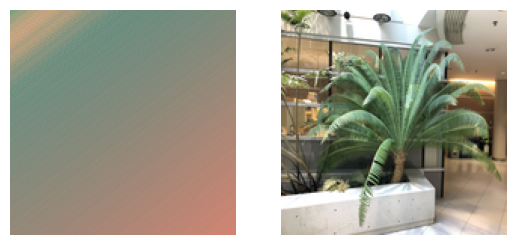

Validation: |          | 0/? [00:00<?, ?it/s]

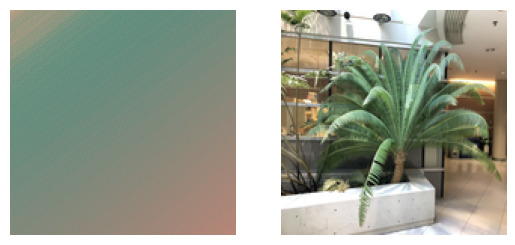

`Trainer.fit` stopped: `max_epochs=5` reached.


In [3]:
trainer.fit(nerfsys)

In [ ]:
import cv2
import os
assert os.path.exists("/home/kolek/Edu/project/IMG_1974.MOV")

vidcap = cv2.VideoCapture("/home/kolek/Edu/project/IMG_1974.MOV")
success, image = vidcap.read()

#os.mkdir(f"{self.train_path}/images")
#os.mkdir(f"{self.val_path}/images")
#os.mkdir(f"{self.image_dump_path}/images")
count = 0
while success:
    cv2.imwrite(f"/home/kolek/Edu/project/nerf_crocs/images/frame{count}.jpg", image)     # save frame as JPEG file      
    success,image = vidcap.read()
    count += 1
print(f"total images {count}")

total images 507
